In [1]:
pip install tensorflow numpy matplotlib

In [2]:
import tensorflow as tf

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

170498071/170498071 [==============================] - 3s 0us/step


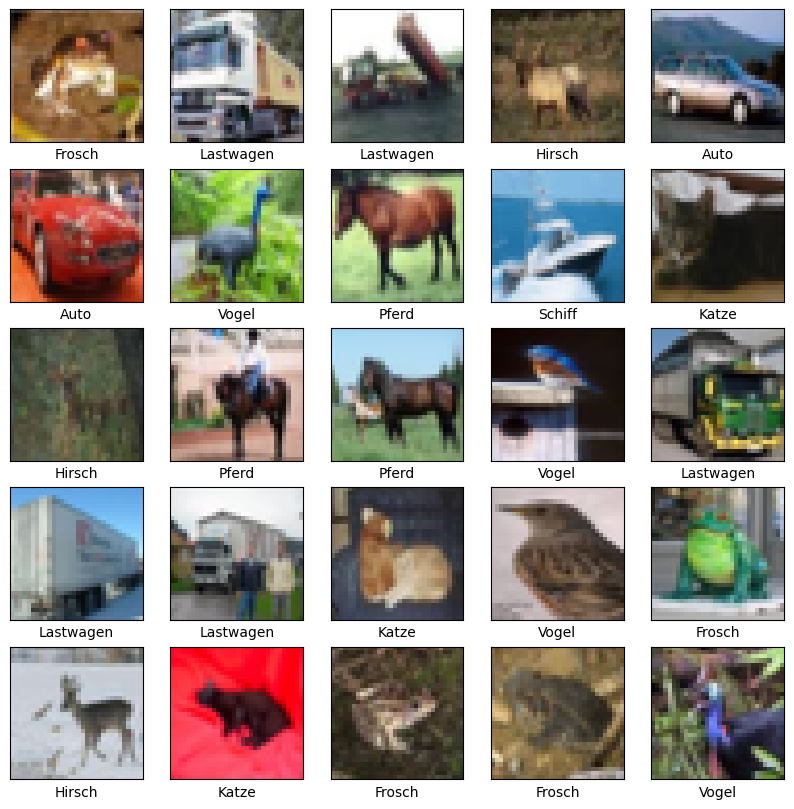

In [10]:
import matplotlib.pyplot as plt

class_names = ['Flugzeug', 'Auto', 'Vogel', 'Katze', 'Hirsch', 'Hund', 'Frosch', 'Pferd', 'Schiff', 'Lastwagen']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(True)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i][0]])
plt.show()

In [5]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [6]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [7]:
history = model.fit(x_train, y_train, epochs=10,
                    validation_data=(x_test, y_test))

Epoch 1/10
1563/1563 [==============================] - 79s 50ms/step - loss: 1.5027 - accuracy: 0.4542 - val_loss: 1.2756 - val_accuracy: 0.5486
Epoch 2/10
1563/1563 [==============================] - 74s 47ms/step - loss: 1.1503 - accuracy: 0.5910 - val_loss: 1.0983 - val_accuracy: 0.6136
Epoch 3/10
1563/1563 [==============================] - 72s 46ms/step - loss: 0.9959 - accuracy: 0.6511 - val_loss: 0.9595 - val_accuracy: 0.6658
Epoch 4/10
1563/1563 [==============================] - 71s 45ms/step - loss: 0.8890 - accuracy: 0.6905 - val_loss: 0.8927 - val_accuracy: 0.6873
Epoch 5/10
1563/1563 [==============================] - 74s 48ms/step - loss: 0.8135 - accuracy: 0.7152 - val_loss: 0.9128 - val_accuracy: 0.6844
Epoch 6/10
1563/1563 [==============================] - 74s 47ms/step - loss: 0.7508 - accuracy: 0.7382 - val_loss: 0.8623 - val_accuracy: 0.7001
Epoch 7/10
1563/1563 [==============================] - 74s 47ms/step - loss: 0.6934 - accuracy: 0.7581 - val_loss: 0.8755 -

In [9]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print('\nTestgenauigkeit:', test_acc)

313/313 - 5s - loss: 0.8556 - accuracy: 0.7143 - 5s/epoch - 14ms/step

Testgenauigkeit: 0.7142999768257141
